In [1]:
# import modules
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# import main code
import sys
sys.path.append('/home/jannik/MA/fertige-MA/gitrepo')
from master_project import *

lal.MSUN_SI != Msun
setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work
Loaded NRSur7dq4Remnant fit.
Loaded NRSur7dq4 model


In [2]:
# configuration
q = 2

a = 0.8
phi1 = 0
theta1 = 2*np.pi/3

chi1x = a * np.sin(theta1) * np.cos(phi1)
chi1y = a * np.sin(theta1) * np.sin(phi1)
chi1z = a * np.cos(theta1)
chi1 = [chi1x, chi1y, chi1z]

chi2 = [0.,0.,0.]

chi1

[0.692820323027551, 0.0, -0.39999999999999986]

In [3]:
# calculate waveform from gwsurr 
t_ref = -100
f_ref = get_f_ref(q, chi1, chi2, t_ref)
                  
t, h_iner, dyn = sur(q, chi1, chi2, dt=dt, f_ref=f_ref, f_low=f_low)
h_copr = modes_from_iner_to_new_frame(t, h_iner, frame='coprecessing')
h_coro = modes_from_iner_to_new_frame(t, h_iner, frame='corotating')

print(np.max(ampl_asym(h_iner, 2,2)))

0.08121674696542384


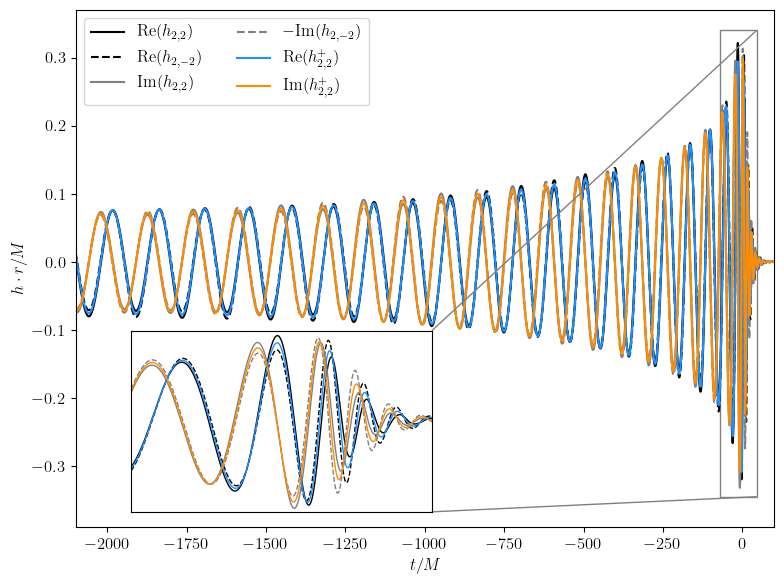

In [4]:
# setup plotting
fig = plt.figure()
ax1 = fig.add_subplot(111)
axins = ax1.inset_axes([0.08, 0.03, 0.43, 0.35])


# full plot 
ax1.plot(t, np.real(h_iner[2,2]), color='black' , label=r'Re$(h_{2,2})$')
ax1.plot(t, np.real(h_iner[2,-2]),'--', color='black' , label=r'Re$(h_{2,-2})$')
ax1.plot(t, np.imag(h_iner[2,2]), color='grey' , label=r'Im$(h_{2,2})$')
ax1.plot(t, -np.imag(h_iner[2,-2]),'--', color='grey' , label=r'$-$Im$(h_{2,-2})$')
ax1.plot(t, np.real(h_sym(h_iner, 2, 2)), color='dodgerblue',label=r'Re$(h_{2,2}^+)$')
ax1.plot(t, np.imag(h_sym(h_iner, 2, 2)), color='darkorange',label=r'Im$(h_{2,2}^+)$')

ax1.set_ylabel('$h\cdot r/M$')
ax1.set_xlabel('$t/M$')
ax1.legend(loc='upper left', ncol=2)
ax1.set_xlim(-2100,100)
ax1.set_ylim(-0.39,0.37)


# inset plot
axins.plot(t, np.real(h_iner[2,2]), color='black', linewidth=1)
axins.plot(t, np.real(h_iner[2,-2]),'--', color='black' , linewidth=1)
axins.plot(t, np.imag(h_iner[2,2]), color='grey', linewidth=1)
axins.plot(t, -np.imag(h_iner[2,-2]),'--', color='grey', linewidth=1)
axins.plot(t, np.real(h_sym(h_iner, 2, 2)), color='dodgerblue', linewidth=1)
axins.plot(t, np.imag(h_sym(h_iner, 2, 2)), color='darkorange', linewidth=1)

x1, x2, y1, y2 = -70, 45, -.345, .34 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.set_xticks([])
axins.set_yticks([])
mark_inset(ax1, axins, loc1=4, loc2=1, fc="none", ec="0.5")

fig.tight_layout()
#fig.savefig('re_im_sym_modes.pdf')
plt.show()

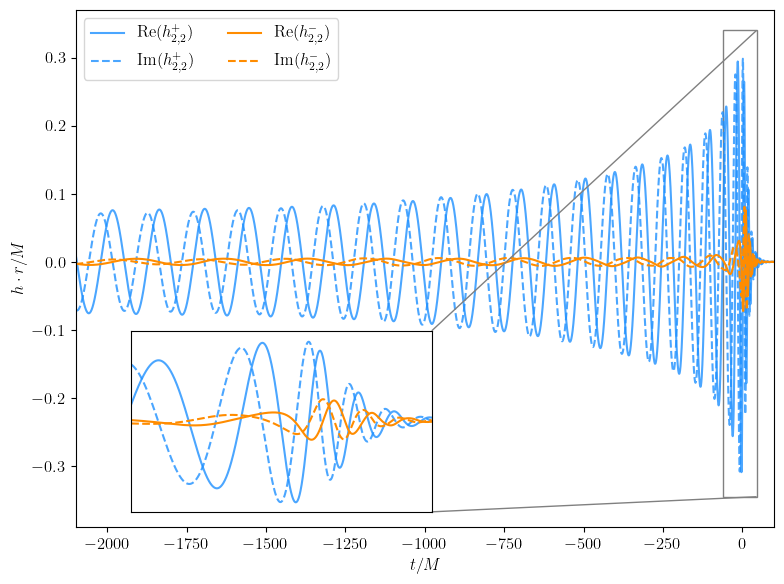

In [5]:
# setup plotting
fig = plt.figure()
ax1 = fig.add_subplot(111)
axins = ax1.inset_axes([0.08, 0.03, 0.43, 0.35])


# full plot 
ax1.plot(t, np.real(h_sym(h_iner, 2, 2)), color='dodgerblue', alpha=0.8, label=r'Re$(h_{2,2}^+)$')
ax1.plot(t, np.imag(h_sym(h_iner, 2, 2)), '--', color='dodgerblue', alpha=0.8, label=r'Im$(h_{2,2}^+)$')
ax1.plot(t, np.real(h_asym(h_iner, 2, 2)), color='darkorange', label=r'Re$(h_{2,2}^-)$')
ax1.plot(t, np.imag(h_asym(h_iner, 2, 2)), '--', color='darkorange', label=r'Im$(h_{2,2}^-)$')

ax1.set_ylabel('$h\cdot r/M$')
ax1.set_xlabel('$t/M$')
ax1.legend(loc='upper left', ncol=2)
ax1.set_xlim(-2100,100)
ax1.set_ylim(-0.39,0.37)


# inset plot
axins.plot(t, np.real(h_sym(h_iner, 2, 2)), color='dodgerblue', alpha=0.8)
axins.plot(t, np.imag(h_sym(h_iner, 2, 2)), '--', color='dodgerblue', alpha=0.8)
axins.plot(t, np.real(h_asym(h_iner, 2, 2)), color='darkorange')
axins.plot(t, np.imag(h_asym(h_iner, 2, 2)), '--', color='darkorange')

x1, x2, y1, y2 = -60, 45, -.345, .34 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.set_xticks([])
axins.set_yticks([])
mark_inset(ax1, axins, loc1=4, loc2=1, fc="none", ec="0.5")

fig.tight_layout()
#fig.savefig('re_im_sym_vs_asym.pdf')
plt.show()

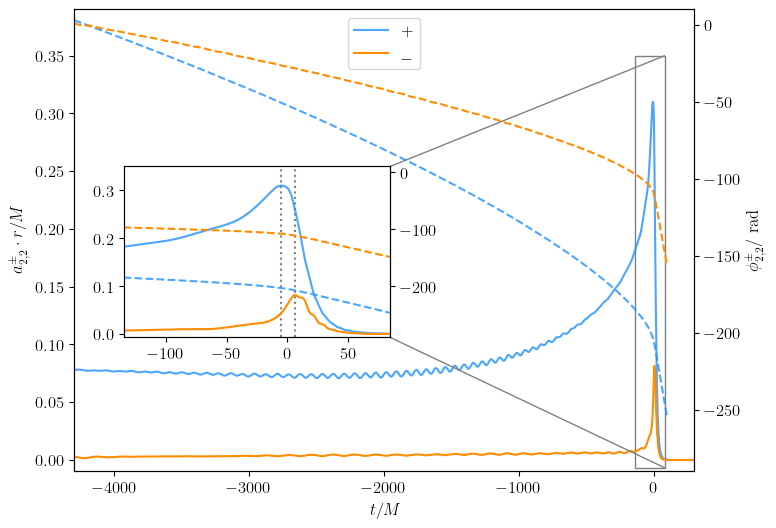

In [6]:
# setup plotting
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
axins = ax1.inset_axes([0.08, 0.29, 0.43, 0.37])
axins2 = axins.twinx()

# plot amplitudes
ax1.plot(t, ampl_sym(h_iner, 2, 2), color='dodgerblue', alpha=0.8, label=r'$+$')
ax1.plot(t, ampl_asym(h_iner, 2, 2), color='darkorange',label=r'$-$')
ax1.set_ylabel(r'$a_{2,2}^\pm\cdot r/M$')
ax1.set_ylim(-0.01,0.39)
ax1.set_xlim(-4300,300)
ax1.set_xlabel('$t/M$')
ax1.hlines(y=0., xmin=100, xmax=300, color='darkorange')
ax1.legend(loc='upper center')

# plot phase
ax2.plot(t, phi_sym(h_iner, 2, 2),'--', color='dodgerblue', alpha=0.8)
ax2.plot(t, phi_asym(h_iner, 2, 2),'--', color='darkorange')
ax2.set_ylabel(r'$\phi_{2,2}^\pm/$ rad')
ax2.set_ylim(-290, 10)

# plot inset
x1, x2, y1, y2 = -135, 85, -.007, .35 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
mark_inset(ax1, axins, loc1=4, loc2=1, fc="none", ec="0.5")
axins.axvline(t[np.argmax(ampl_asym(h_iner, 2, 2))], linestyle=':', color='grey')
axins.axvline(t[np.argmax(ampl_sym(h_iner, 2, 2))], linestyle=':', color='grey')
axins.plot(t, ampl_sym(h_iner, 2, 2), color='dodgerblue', alpha=0.8, label=r'$+$')
axins.plot(t, ampl_asym(h_iner, 2, 2), color='darkorange',label=r'$-$')
axins.hlines(y=0., xmin=100, xmax=300, color='darkorange')
axins2.plot(t, phi_sym(h_iner, 2, 2),'--', color='dodgerblue', alpha=0.8)
axins2.plot(t, phi_asym(h_iner, 2, 2),'--', color='darkorange')
axins2.set_ylim(-290, 10)

#fig.savefig('ampl_phase_sym_asym.pdf')
plt.show()

In [7]:
np.max(ampl_asym(h_iner, 2, 2))/np.max(ampl_sym(h_iner, 2, 2))

0.26201152416599505

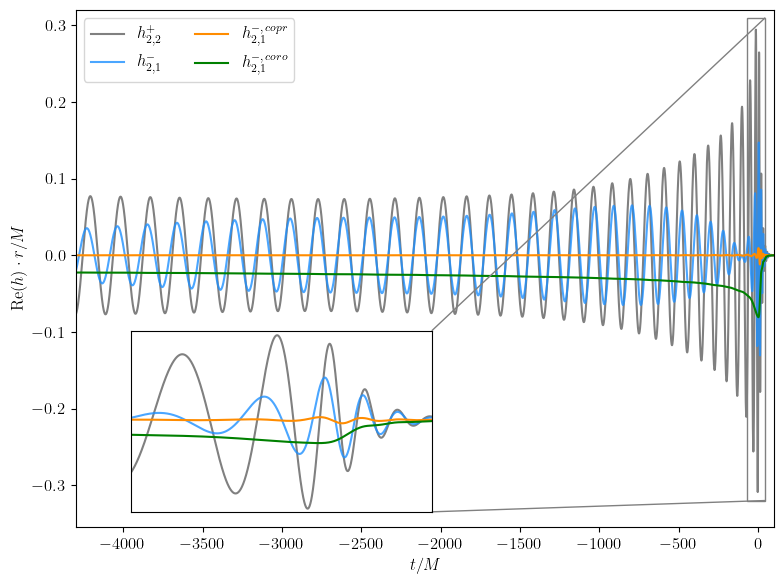

In [8]:
# setup plotting
fig = plt.figure()
ax1 = fig.add_subplot(111)
axins = ax1.inset_axes([0.08, 0.03, 0.43, 0.35])

# full plot 
ax1.plot(t, np.real(h_sym(h_iner, 2, 2)), color='grey', label=r'$h_{2,2}^+$')
ax1.plot(t, np.real(h_asym(h_iner, 2, 1)), color='dodgerblue', alpha=0.8, label=r'$h_{2,1}^-$')
ax1.plot(t, np.real(h_asym(h_copr, 2, 1)), color='darkorange', label=r'$h_{2,1}^{-,\,copr}$')
ax1.plot(t, np.real(h_asym(h_coro, 2, 1)), color='green', label=r'$h_{2,1}^{-,\,coro}$')

ax1.set_ylabel('Re$(h)\cdot r/M$')
ax1.set_xlabel('$t/M$')
ax1.legend(loc='upper left', ncol=2)
ax1.set_xlim(-4300,100)
ax1.set_ylim(-0.355,0.32)

# inset plot
axins.plot(t, np.real(h_sym(h_iner, 2, 2)), color='grey')
axins.plot(t, np.real(h_asym(h_iner, 2, 1)), color='dodgerblue', alpha=0.8)
axins.plot(t, np.real(h_asym(h_copr, 2, 1)), color='darkorange')
axins.plot(t, np.real(h_asym(h_coro, 2, 1)), color='green')

x1, x2, y1, y2 = -70, 45, -.32, .31 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.set_xticks([])
axins.set_yticks([])
mark_inset(ax1, axins, loc1=4, loc2=1, fc="none", ec="0.5")

fig.tight_layout()
#fig.savefig('re_21_frames.pdf')
plt.show()

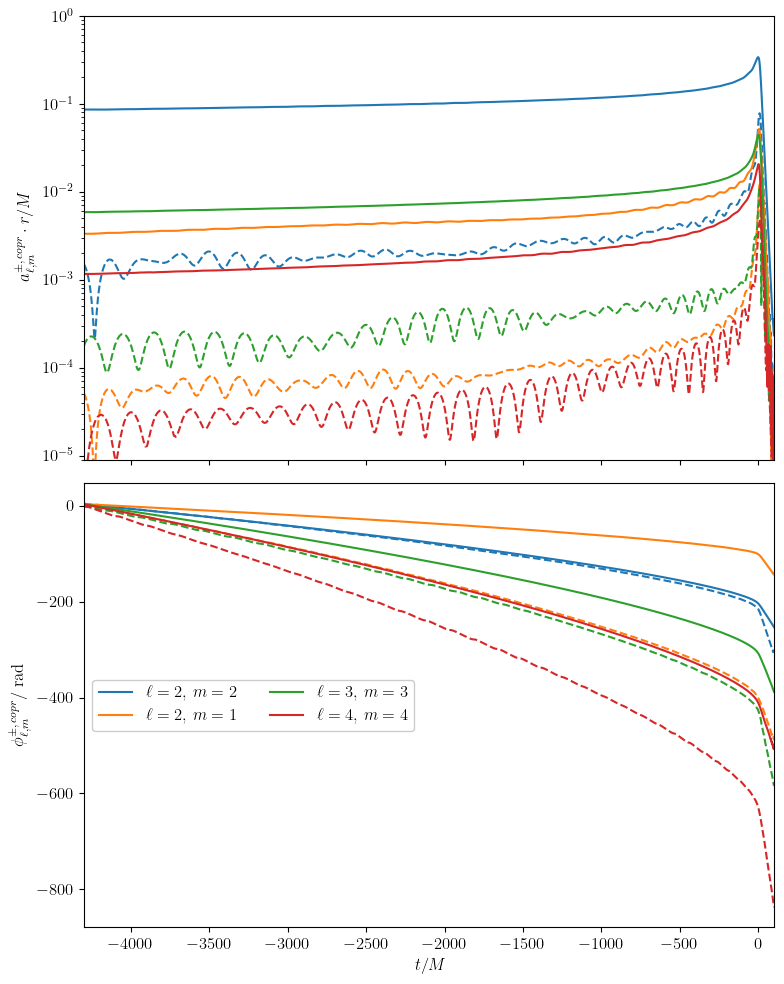

In [34]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, sharex = ax1)

mode_list_m_pos = [[2,2], [2,1], [3,3], [4,4]]# [3,1], [4,4], [4,3], [4,2], [4,1]]

for mode in mode_list_m_pos:
    
    # amplitude
    ampl_s = ampl_sym(h_copr, mode[0], mode[1])
    ampl_a = ampl_asym(h_copr, mode[0], mode[1])
    line, = ax1.semilogy(t, ampl_s)
    ax1.semilogy(t, ampl_a, linestyle='--', color=line.get_color())
    
    # phase
    phi_s = phi_sym(h_copr, mode[0], mode[1])
    phi_a = phi_asym(h_copr, mode[0], mode[1])
    line, = ax2.plot(t, phi_s, label='$\ell=%s,\,m=%s$' %(mode[0], mode[1]))
    ax2.plot(t, (2)*phi_a, linestyle='--', color=line.get_color())

ax1.set_ylabel('$a_{\ell,m}^{\pm,\,copr}\cdot r/M$')
ax1.set_ylim(0.9*1e-5, 1)
ax1.tick_params('x', labelbottom=False)
ax1.set_xlim(-4300, 100)

ax2.set_ylabel(r'$\phi_{\ell,m}^{\pm,\,copr}/$ rad')
ax2.set_xlabel('$t/M$')
ax2.legend(loc='center left', framealpha=1, ncol=2)

fig.tight_layout()
#fig.savefig('ampl_phase_subdom.pdf')
plt.show()

In [21]:
17/12

1.4166666666666667

In [28]:
5.2*5

26.0